In [443]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [444]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score

In [445]:
def roundoff(arr):
    for i in range(0, len(arr)):
        if arr[i] >= 0.5:
            arr[i] = 1;
        else:
            arr[i] = 0;
    return arr

In [446]:
a, b = make_moons(n_samples=20, noise=0.1)
df = pd.DataFrame(dict(f1=a[:,0], f2=a[:,1], label=b))
df.head()

,f1,f2,label
0,0.793809,-0.526139,1
1,1.378468,-0.316223,1
2,-0.443290,0.770801,0
3,0.228993,-0.185399,1
4,0.907784,0.448464,0


In [447]:
#Feature selection
X = df.iloc[:,0:1]  #Features
Y = df.label        #Class/output variable

In [448]:
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.3, random_state=3)

lr = LogisticRegression(penalty='none', solver='lbfgs')
lr.fit(X_train, y_train)

rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; 
#low alpha > more generalization

rr.fit(X_train, y_train)

rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [449]:
y_pred_l = lr.predict(X_test)
y_pred_rr = rr.predict(X_test)
y_pred_rr100 = rr100.predict(X_test)

In [450]:
y_pred_rr = roundoff(y_pred_rr)
y_pred_rr100 = roundoff(y_pred_rr100)

In [451]:
from sklearn.metrics import mean_squared_error

test_score  = np.sqrt(mean_squared_error(y_test, y_pred_l))
Ridge_test_score = np.sqrt(mean_squared_error(y_test, y_pred_rr))
Ridge_test_score100 = np.sqrt(mean_squared_error(y_test, y_pred_rr100))

print("logistic regression rmse:", test_score)
print("ridge regression rmse low alpha:", Ridge_test_score)
print("ridge regression rsme high alpha:", Ridge_test_score100)

logistic regression rmse: 0.5773502691896257
ridge regression rmse low alpha: 0.5773502691896257
ridge regression rsme high alpha: 0.816496580927726


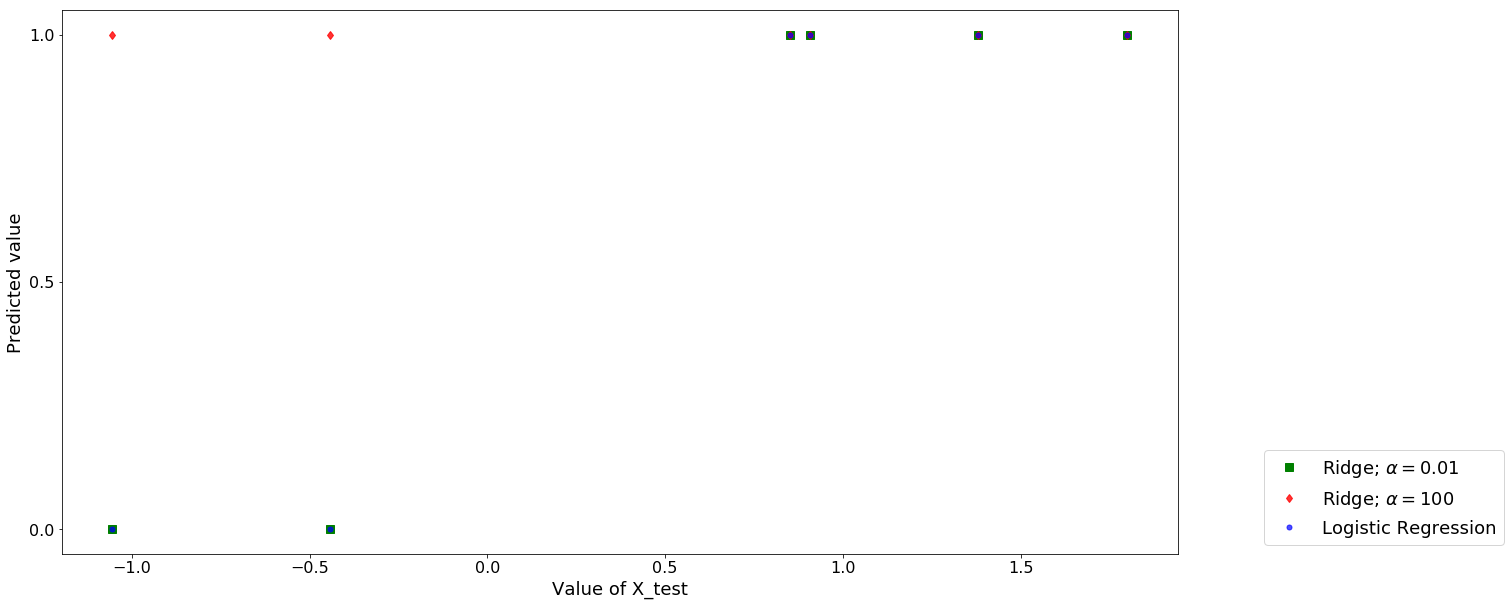

In [452]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(20, 10))
plt.plot(X_test, y_pred_rr, alpha=1,linestyle='none',marker='s',markersize=8,color='green',label=r'Ridge; $\alpha = 0.01$') # zorder for ordering the markers
plt.plot(X_test, y_pred_rr100, alpha=0.8,linestyle='none',marker='d',markersize=6,color='red',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(X_test, y_pred_l, alpha=0.7,linestyle='none',marker='o',markersize=5,color='blue',label='Logistic Regression')
plt.ylabel('Predicted value',fontsize=18)
plt.xlabel('Value of X_test',fontsize=18)
plt.yticks(np.arange(0, 1.5, 0.5)) 
plt.legend(fontsize=18,loc='lower right', bbox_to_anchor=(1.3, 0.0))
plt.savefig('value.png')
plt.show()